##### Copyright 2018 The TensorFlow Authors.

In [2]:
import numpy as np

In [3]:
image = np.array([[1,2,3,0,1],
                  [4,5,6,1,0],
                  [7,8,9,0,1],
                  [0,1,2,4,5],
                  [1,2,3,4,5]])
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])
filter_size = filter.shape[0]
result=np.zeros((image.shape[0]-filter_size+1,image.shape[1]-filter_size+1))
for i in range(result.shape[0]):
  for j in range(result.shape[1]):
    result[i,j]=np.sum(image[i:i+filter_size,j:j+filter_size]*filter)
print(result)

print(image)


[[-6. 14. 16.]
 [-6.  9. 11.]
 [-6.  3.  3.]]
[[1 2 3 0 1]
 [4 5 6 1 0]
 [7 8 9 0 1]
 [0 1 2 4 5]
 [1 2 3 4 5]]


In [7]:
feature_map= np.array([[1,3,2,4],
                       [5,6,1,2],
                       [7,8,3,1],
                       [2,3,4,5]])
pool_size = 2
result=np.zeros((int(feature_map.shape[0]//pool_size),int(feature_map.shape[1]//pool_size)))
for i in range(result.shape[0]):
  for j in range(result.shape[1]):
    result[i,j]=np.max(feature_map[i*pool_size:(i+1)*pool_size,j*pool_size:(j+1)*pool_size])
print(f"original feature Map:\n{feature_map}")

print(f"Max Pooling result:\n{result}")

original feature Map:
[[1 3 2 4]
 [5 6 1 2]
 [7 8 3 1]
 [2 3 4 5]]
Max Pooling result:
[[6. 4.]
 [8. 5.]]


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(f"training datashape :{train_images.shape}")
print(f"test data shape :{test_images.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
training datashape :(50000, 32, 32, 3)
test data shape :(10000, 32, 32, 3)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 42ms/step - accuracy: 0.2796 - loss: 1.9252 - val_accuracy: 0.4765 - val_loss: 1.4904
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 45ms/step - accuracy: 0.4629 - loss: 1.4826 - val_accuracy: 0.5652 - val_loss: 1.2312
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 41ms/step - accuracy: 0.5159 - loss: 1.3543 - val_accuracy: 0.5759 - val_loss: 1.2232
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 41ms/step - accuracy: 0.5503 - loss: 1.2620 - val_accuracy: 0.6165 - val_loss: 1.0909
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.5684 - loss: 1.2008 - val_accuracy: 0.6457 - val_loss: 1.0089
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.5874 - loss: 1.1615 - val_accuracy: 0.6517 - val_loss: 1.0191
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.6006 - loss: 1.1166 - val_accuracy: 0.6607 - val_loss: 0.9807
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.6123 -

In [5]:
test_loss,test_acc =model.evaluate(test_images,test_labels)
print(f"test accuracy:{test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6813 - loss: 0.9414
test accuracy:0.6794


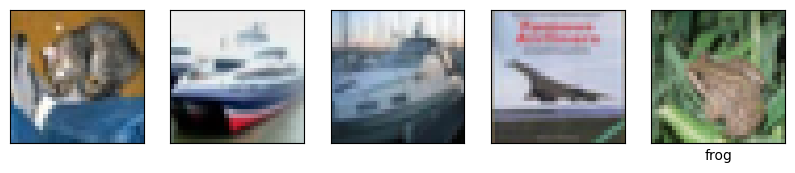

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Image:1
true label : cat
predicted label:cat



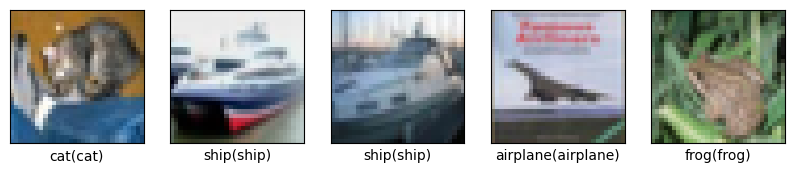

Image:2
true label : ship
predicted label:ship



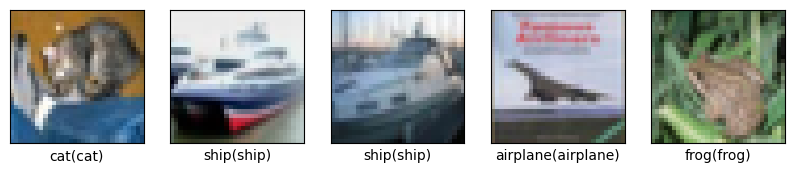

Image:3
true label : ship
predicted label:ship



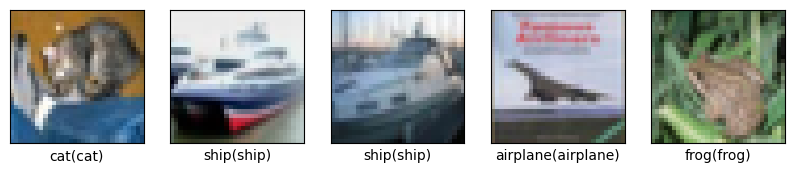

Image:4
true label : airplane
predicted label:airplane



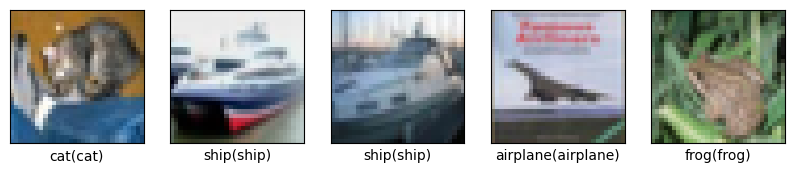

Image:5
true label : frog
predicted label:frog



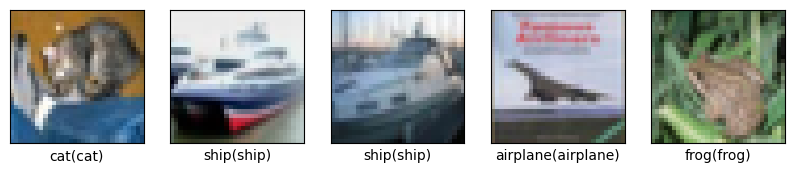

In [16]:
import numpy as np
import matplotlib.pyplot as plt
test_images_subset=test_images[:5]

test_labels_subset = test_labels[:5]
class_names = ['airplane','automobile','bird','cat','x`','dog','frog','horse','ship','truck']
plt.figure(figsize=(10,2))
for i in range(len(test_images_subset)):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images_subset[i],cmap=plt.cm.binary)
plt.xlabel(class_names[np.argmax(test_labels_subset[i])])
plt.show()
predictions = model.predict(test_images_subset)
for i in range(len(test_images_subset)):
  predicted_label = np.argmax(predictions[i])
  true_label = np.argmax(test_labels_subset[i])
  print(f"Image:{i+1}")
  print(f"true label : {class_names[true_label]}")
  print(f"predicted label:{class_names[predicted_label]}")
  print()
  plt.figure(figsize=(10,2))
  for i in range(len(test_images_subset)):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images_subset[i],cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = np.argmax(test_labels_subset[i])
    plt.xlabel(f"{class_names[predicted_label]}({class_names[true_label]})")
  plt.show()

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## **Introduction to Colab and Python**

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l01c01_introduction_to_colab_and_python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

Welcome to this Colab where you will get a quick introduction to the Python programming language and the environment used for the course's exercises: Colab.

Colab is a Python development environment that runs in the browser using Google Cloud.

For example, to print "Hello World", just hover the mouse over [ ] and press the play button to the upper left. Or press shift-enter to execute.

In [ ]:
print("Hello World")

## Functions, Conditionals, and Iteration
Let's create a Python function, and call it from a loop.

In [ ]:
def HelloWorldXY(x, y):
  if (x < 10):
    print("Hello World, x was < 10")
  elif (x < 20):
    print("Hello World, x was >= 10 but < 20")
  else:
    print("Hello World, x was >= 20")
  return x + y

for i in range(8, 25, 5):  # i=8, 13, 18, 23 (start, stop, step)
  print("--- Now running with i: {}".format(i))
  r = HelloWorldXY(i,i)
  print("Result from HelloWorld: {}".format(r))

In [ ]:
print(HelloWorldXY(1,2))

Easy, right?

If you want a loop starting at 0 to 2 (exclusive) you could do any of the following

In [ ]:
print("Iterate over the items. `range(2)` is like a list [0,1].")
for i in range(2):
  print(i)

print("Iterate over an actual list.")
for i in [0,1]:
  print(i)

print("While works")
i = 0
while i < 2:
  print(i)
  i += 1

In [ ]:
print("Python supports standard key words like continue and break")
while True:
  print("Entered while")
  break

## Numpy and lists
Python has lists built into the language.
However, we will use a library called numpy for this.
Numpy gives you lots of support functions that are useful when doing Machine Learning.

Here, you will also see an import statement. This statement makes the entire numpy package available and we can access those symbols using the abbreviated 'np' syntax.

In [ ]:
import numpy as np  # Make numpy available using np.

# Create a numpy array, and append an element
a = np.array(["Hello", "World"])
a = np.append(a, "!")
print("Current array: {}".format(a))
print("Printing each element")
for i in a:
  print(i)

print("\nPrinting each element and their index")
for i,e in enumerate(a):
  print("Index: {}, was: {}".format(i, e))

In [ ]:
print("\nShowing some basic math on arrays")
b = np.array([0,1,4,3,2])
print("Max: {}".format(np.max(b)))
print("Average: {}".format(np.average(b)))
print("Max index: {}".format(np.argmax(b)))

In [ ]:
print("\nYou can print the type of anything")
print("Type of b: {}, type of b[0]: {}".format(type(b), type(b[0])))

In [ ]:
print("\nUse numpy to create a [3,3] dimension array with random number")
c = np.random.rand(3, 3)
print(c)

In [ ]:
print("\nYou can print the dimensions of arrays")
print("Shape of a: {}".format(a.shape))
print("Shape of b: {}".format(b.shape))
print("Shape of c: {}".format(c.shape))
print("...Observe, Python uses both [0,1,2] and (0,1,2) to specify lists")

## Colab Specifics

Colab is a virtual machine you can access directly. To run commands at the VM's terminal, prefix the line with an exclamation point (!).


In [ ]:
print("\nDoing $ls on filesystem")
!ls -l
!pwd

In [ ]:
print("Install numpy")  # Just for test, numpy is actually preinstalled in all Colab instances
!pip install numpy

**Exercise**

Create a code cell underneath this text cell and add code to:


*   List the path of the current directory (pwd)
* Go to / (cd) and list the content (ls -l)

In [ ]:
!pwd
!cd /
!ls -l
print("Hello")

All usage of Colab in this course is completely free or charge. Even GPU usage is provided free of charge for some hours of usage every day.

**Using GPUs**
* Many of the exercises in the course executes more quickly by using GPU runtime: Runtime | Change runtime type | Hardware accelerator | GPU

**Some final words on Colab**
*   You execute each cell in order, you can edit & re-execute cells if you want
*   Sometimes, this could have unintended consequences. For example, if you add a dimension to an array and execute the cell multiple times, then the cells after may not work. If you encounter problem reset your environment:
  *   Runtime -> Restart runtime... Resets your Python shell
  *   Runtime -> Restart all runtimes... Will reset the Colab image, and get you back to a 100% clean environment
* You can also clear the output in the Colab by doing: Edit -> Clear all outputs
* Colabs in this course are loaded from GitHub. Save to your Google Drive if you want a copy with your code/output: File -> Save a copy in Drive...

**Learn More**
*   Check out [this](https://www.youtube.com/watch?v=inN8seMm7UI&list=PLQY2H8rRoyvwLbzbnKJ59NkZvQAW9wLbx&index=3) episode of #CodingTensorFlow, and don't forget to subscribe to the YouTube channel ;)
